<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Sommaire
        </h1>
    </div>
</div>

- **[Preparation du dataset](#pre)**

- **[Verification des annotations](#ve)**

- **[Yolor entrainement](#en)**

- **[Resultat](#re)**

- **[Test du modele](#te)**



https://github.com/ismailazdad/vision_detection_benchmark

In [1]:
!git clone https://github.com/WongKinYiu/yolor

Cloning into 'yolor'...
remote: Enumerating objects: 492, done.
remote: Total 492 (delta 0), reused 0 (delta 0), pack-reused 492
Receiving objects: 100% (492/492), 3.42 MiB | 16.70 MiB/s, done.
Resolving deltas: 100% (227/227), done.


In [2]:
cd /content/yolor/

/content/yolor


In [3]:
!pwd

/content/yolor


To setup our development environment, we will first clone the base YOLOR repository and download the necessary requirements:

In [4]:
!git reset --hard eb3ef0b7472413d6740f5cde39beb1a2f5b8b5d1

fatal: Could not parse object 'eb3ef0b7472413d6740f5cde39beb1a2f5b8b5d1'.


In [5]:
!pip install -qr requirements.txt

     |████████████████████████████████| 596 kB 5.2 MB/s 
     |████████████████████████████████| 776.7 MB 3.9 kB/s 
     |████████████████████████████████| 12.7 MB 34.4 MB/s 
     |████████████████████████████████| 1.5 MB 88.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.7.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.7.0 which is incompatible.


In [6]:
# Install Mish CUDA
!git clone https://github.com/JunnYu/mish-cuda

Cloning into 'mish-cuda'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 195 (delta 7), reused 79 (delta 3), pack-reused 107
Receiving objects: 100% (195/195), 208.77 KiB | 3.07 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [7]:
cd mish-cuda

/content/yolor/mish-cuda


In [8]:
!git reset --hard 6f38976064cbcc4782f4212d7c0c5f6dd5e315a8

HEAD is now at 6f38976 Update README.md


In [9]:
!python setup.py build install

/usr/lib/python3.7/distutils/extension.py:131: UserWarning: Unknown Extension options: 'headers'
  warnings.warn(msg)
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/mish_cuda
copying src/mish_cuda/__init__.py -> build/lib.linux-x86_64-3.7/mish_cuda
running egg_info
creating src/mish_cuda.egg-info
writing src/mish_cuda.egg-info/PKG-INFO
writing dependency_links to src/mish_cuda.egg-info/dependency_links.txt
writing requirements to src/mish_cuda.egg-info/requires.txt
writing top-level names to src/mish_cuda.egg-info/top_level.txt
writing manifest file 'src/mish_cuda.egg-info/SOURCES.txt'
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:339: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
adding license file 'LICENSE'
writing manifest file 'src/mish

In [10]:
cd ..

/content/yolor


In [11]:
# Install PyTorch Wavelets
!git clone https://github.com/fbcotter/pytorch_wavelets

Cloning into 'pytorch_wavelets'...
remote: Enumerating objects: 972, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 972 (delta 75), reused 89 (delta 45), pack-reused 836
Receiving objects: 100% (972/972), 6.80 MiB | 30.40 MiB/s, done.
Resolving deltas: 100% (659/659), done.


In [12]:
cd pytorch_wavelets

/content/yolor/pytorch_wavelets


In [13]:
!pip install .

Processing /content/yolor/pytorch_wavelets
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for pytorch-wavelets: filename=pytorch_wavelets-1.3.0-py3-none-any.whl size=54869 sha256=54b726b2fcadbda6855bf8b7ca9561b5d1c025adbad246348f6de903756e7e4b
  Stored in directory: /tmp/pip-ephem-wheel-cache-tfut3ldd/wheels/68/d6/0a/629cb6c68e1577155ab73a47758996d9ab26f15ba622561e28
Successfully built pytorch-wavelets


In [14]:
cd ..

/content/yolor


In [15]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [16]:
cd ..

/content


In [17]:
!mkdir Road_Sign_Dataset

In [18]:
!pwd

/content


<a name='pre'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Preparation du datatset
        </h1>
    </div>
</div>

In [19]:
cd Road_Sign_Dataset

/content/Road_Sign_Dataset


In [20]:
!pwd

/content/Road_Sign_Dataset


In [ ]:
# cd /media/ismail/Elements/formation/projet7/feux/RoadSignDetectionDataset

/media/ismail/Elements/formation/projet7/feux/RoadSignDetectionDataset


In [ ]:
#  !rm -rf /content/annotations/

In [21]:
!wget -O RoadSignDetectionDataset.zip https://arcraftimages.s3-accelerate.amazonaws.com/Datasets/RoadSigns/RoadSignsPascalVOC.zip?region=us-east-2

--2022-05-05 14:12:38--  https://arcraftimages.s3-accelerate.amazonaws.com/Datasets/RoadSigns/RoadSignsPascalVOC.zip?region=us-east-2
Resolving arcraftimages.s3-accelerate.amazonaws.com (arcraftimages.s3-accelerate.amazonaws.com)... 108.156.97.59
Connecting to arcraftimages.s3-accelerate.amazonaws.com (arcraftimages.s3-accelerate.amazonaws.com)|108.156.97.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229344361 (219M) [application/zip]
Saving to: ‘RoadSignDetectionDataset.zip’

RoadSignDetectionDa 100%[===================>] 218.72M  99.3MB/s    in 2.2s    

2022-05-05 14:12:41 (99.3 MB/s) - ‘RoadSignDetectionDataset.zip’ saved [229344361/229344361]



In [ ]:
!unzip RoadSignDetectionDataset.zip

In [23]:
rm -rf __MACOSX RoadSignDetectionDataset.zip

In [ ]:
cat annotations/road4.xml


<annotation>
    <folder>images</folder>
    <filename>road4.png</filename>
    <size>
        <width>267</width>
        <height>400</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>trafficlight</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>20</xmin>
            <ymin>109</ymin>
            <xmax>81</xmax>
            <ymax>237</ymax>
        </bndbox>
    </object>
    <object>
        <name>trafficlight</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>116</xmin>
            <ymin>162</ymin>
            <xmax>163</xmax>
            <ymax>272</ymax>
        </bndbox>
    </object>
    <object>
        <name>trafficlight</name>
        <pose>Unspecified</pose>
        <truncated>0</trunca

In [24]:
# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [25]:
print(extract_info_from_xml('annotations/road4.xml'))

{'bboxes': [{'class': 'trafficlight', 'xmin': 20, 'ymin': 109, 'xmax': 81, 'ymax': 237}, {'class': 'trafficlight', 'xmin': 116, 'ymin': 162, 'xmax': 163, 'ymax': 272}, {'class': 'trafficlight', 'xmin': 189, 'ymin': 189, 'xmax': 233, 'ymax': 295}], 'filename': 'road4.png', 'image_size': (267, 400, 3)}


In [26]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"trafficlight": 0,
                           "stop": 1,
                           "speedlimit": 2,
                           "crosswalk": 3}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("annotations", info_dict["filename"].replace("png", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [27]:
# Get the annotations
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "xml"]
annotations.sort()

# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

100%|██████████| 877/877 [00:00<00:00, 8193.48it/s]


<a name='ve'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Verification des annotations
        </h1>
    </div>
</div>

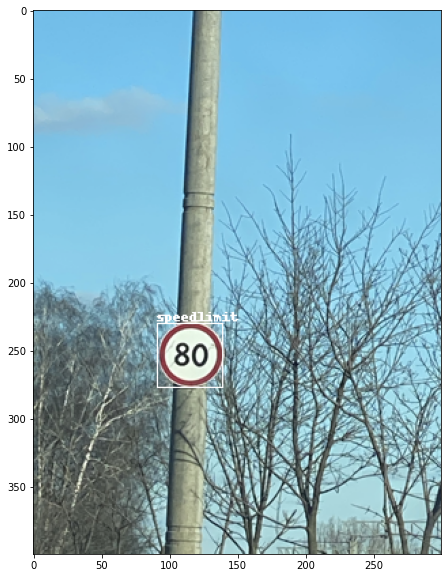

In [28]:
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("annotations", "images").replace("txt", "png")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

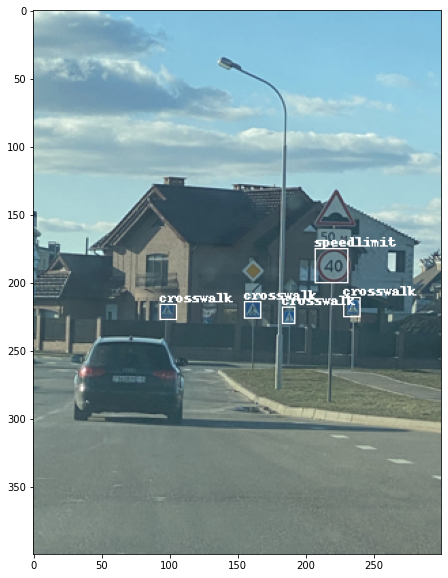

In [29]:
random.seed(25)
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("annotations", "images").replace("txt", "png")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)
#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

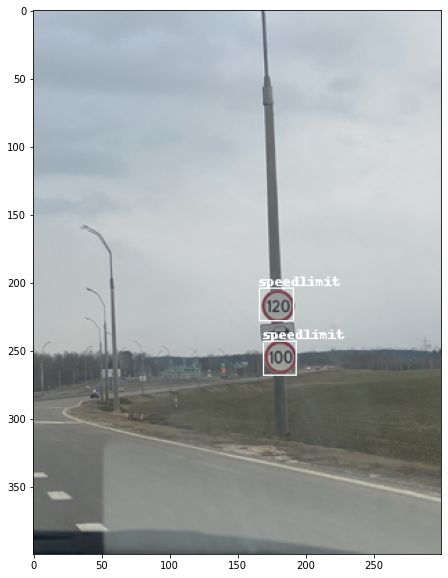

In [30]:
random.seed(150)
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("annotations", "images").replace("txt", "png")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)
#Load the image
image = Image.open(image_file)
fig = plt.figure(figsize=(12,10))
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [31]:
# Read images and annotations
images = [os.path.join('images', x) for x in os.listdir('images')]
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [32]:
!mkdir images/train images/val images/test annotations/train annotations/val annotations/test

In [33]:
!pwd

/content/Road_Sign_Dataset


In [34]:
!rm -rf -d annotations/*.xml

In [35]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'annotations/train/')
move_files_to_folder(val_annotations, 'annotations/val/')
move_files_to_folder(test_annotations, 'annotations/test/')

In [36]:
!mv annotations labels

In [37]:
cd /content/yolor/ 

/content/yolor


In [38]:
!pwd

/content/yolor


In [ ]:
!pip install -r requirements.txt

In [40]:
from google.colab import drive
drive.mount('/content/ShardDrives/', force_remount=True)

Mounted at /content/ShardDrives/


In [41]:
!cp -avr /content/ShardDrives/MyDrive/roadsign/road_sign_data.yaml /content/yolor/data/road_sign_data.yaml

'/content/ShardDrives/MyDrive/roadsign/road_sign_data.yaml' -> '/content/yolor/data/road_sign_data.yaml'


In [42]:
!cp -avr  /content/ShardDrives/MyDrive/roadsign/road_sign_data.names /content/yolor/data/road_sign_data.names 

'/content/ShardDrives/MyDrive/roadsign/road_sign_data.names' -> '/content/yolor/data/road_sign_data.names'


In [43]:
!cp -avr  /content/ShardDrives/MyDrive/roadsign/yolor/plots.py /content/yolor/utils/plots.py

'/content/ShardDrives/MyDrive/roadsign/yolor/plots.py' -> '/content/yolor/utils/plots.py'


In [ ]:
!cp -avr  /content/ShardDrives/MyDrive/roadsign/yolor/yolor_p6.pt /content/yolor/yolor_p6.pt

'/content/ShardDrives/MyDrive/roadsign/yolor/yolor_p6.pt' -> '/content/yolor/yolor_p6.pt'


In [ ]:
!rm -rf /content/yolor/runs/train

In [ ]:
!python train.py --help

usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE]
                [--img-size IMG_SIZE [IMG_SIZE ...]] [--rect]
                [--resume [RESUME]] [--nosave] [--notest] [--noautoanchor]
                [--evolve] [--bucket BUCKET] [--cache-images]
                [--image-weights] [--device DEVICE] [--multi-scale]
                [--single-cls] [--adam] [--sync-bn] [--local_rank LOCAL_RANK]
                [--log-imgs LOG_IMGS] [--workers WORKERS] [--project PROJECT]
                [--name NAME] [--exist-ok]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS     initial weights path
  --cfg CFG             model.yaml path
  --data DATA           data.yaml path
  --hyp HYP             hyperparameters path
  --epochs EPOCHS
  --batch-size BATCH_SIZE
                        total batch size for all GPUs
  --img-size IMG_SIZE [IMG_SIZE ...]
              

<a name='en'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Yolor entrainement
        </h1>
    </div>
</div>

In [ ]:
# !python train.py --batch-size 16 --img 416 416 --data '/content/yolor/data/road_sign_data.yaml' --cfg cfg/yolor_p6.cfg --weights '/content/yolor/yolor_p6.pt' --device 0 --name yolor_p6 --hyp '/content/yolor/data/hyp.scratch.1280.yaml' --epochs 50

!python train.py --batch-size 16 --img 640 --data '/content/yolor/data/road_sign_data.yaml' --cfg cfg/yolor_p6.cfg --weights '/content/yolor/yolor_p6.pt' --device 0 --name yolor_p6 --hyp '/content/yolor/data/hyp.scratch.640.yaml' --epochs 50

Using torch 1.7.0 CUDA:0 (Tesla P100-PCIE-16GB, 16280MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='cfg/yolor_p6.cfg', data='/content/yolor/data/road_sign_data.yaml', device='0', epochs=50, evolve=False, exist_ok=False, global_rank=-1, hyp='/content/yolor/data/hyp.scratch.640.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='yolor_p6', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/yolor_p6', single_cls=False, sync_bn=False, total_batch_size=16, weights='/content/yolor/yolor_p6.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
NumExpr defaulting to 8 threads.
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.3, 'cls_pw': 1.0, 'obj': 0.7, 'obj_p

In [ ]:
!pwd

/content/yolor


<a name='re'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Resultat
        </h1>
    </div>
</div>

In [50]:
!python test.py --names '/content/yolor/data/road_sign_data.names' --data '/content/yolor/data/road_sign_data.yaml' --img 320  --batch 32 --conf 0.001 --iou 0.65 --device 0 --weights /content/ShardDrives/MyDrive/roadsign/results_yolor_p6/weights/best.pt --name test --verbose

Namespace(augment=False, batch_size=32, cfg='cfg/yolor_p6.cfg', conf_thres=0.001, data='/content/yolor/data/road_sign_data.yaml', device='0', exist_ok=False, img_size=320, iou_thres=0.65, name='test', names='/content/yolor/data/road_sign_data.names', project='runs/test', save_conf=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=True, weights=['/content/ShardDrives/MyDrive/roadsign/results_yolor_p6/weights/best.pt'])
Using torch 1.7.0 CUDA:0 (Tesla P100-PCIE-16GB, 16280MB)

Model Summary: 665 layers, 37265016 parameters, 37265016 gradients, 81.564040600 GFLOPS
Scanning labels ../Road_Sign_Dataset/labels/val.cache3 (88 found, 0 missing, 0 empty, 0 duplicate, for 88 images): 88it [00:00, 15224.33it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 3/3 [00:02<00:00,  1.38it/s]
                 all          88         132       0.854       0.947       0.948       0.762
        trafficlight          88         

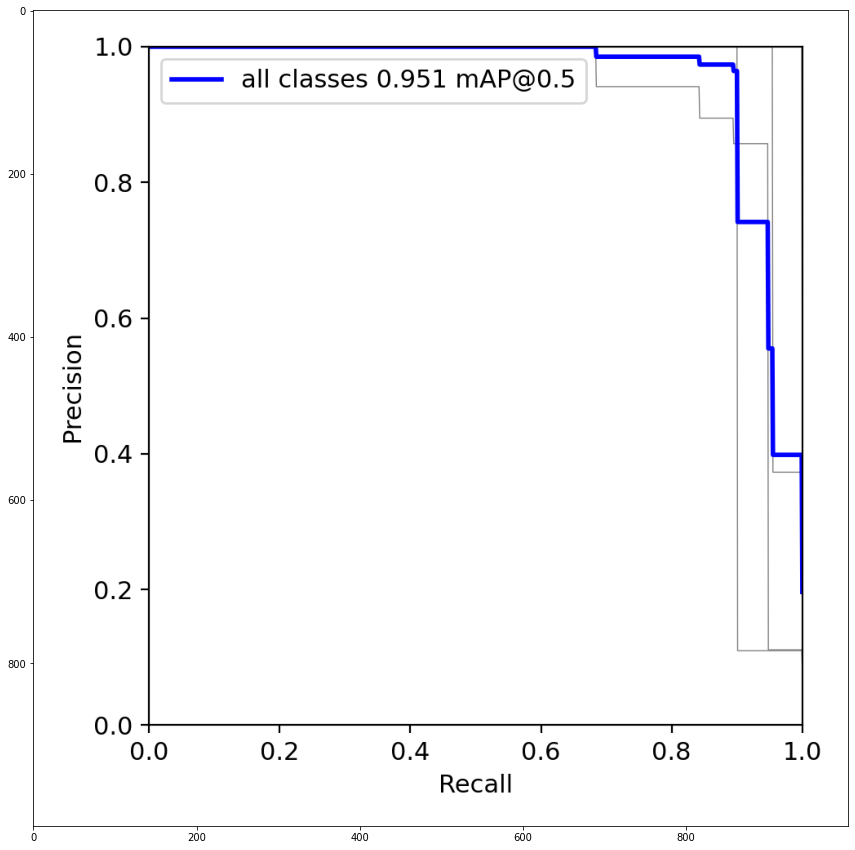

In [ ]:
plt.figure(figsize=(15,15)) 
plt.imshow(np.array(Image.open("/content/yolor/runs/train/yolor_p6/precision-recall_curve.png")))

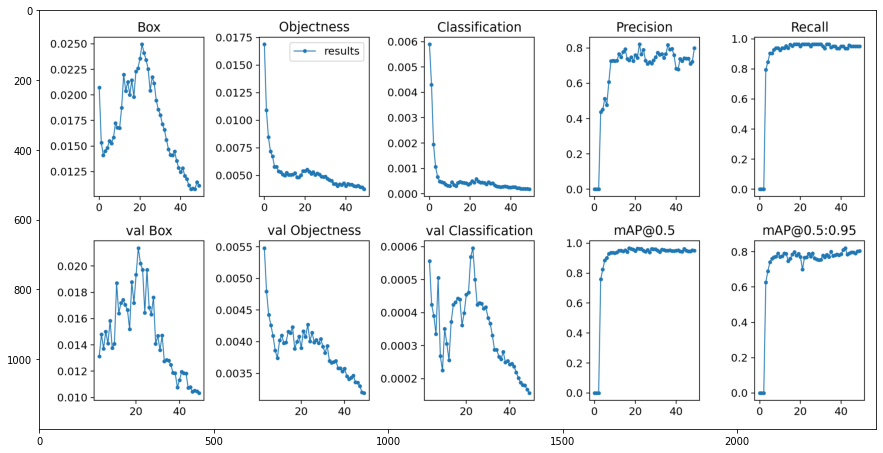

In [ ]:
plt.figure(figsize=(15,15)) 
plt.imshow(np.array(Image.open("/content/yolor/runs/train/yolor_p6/results.png")))

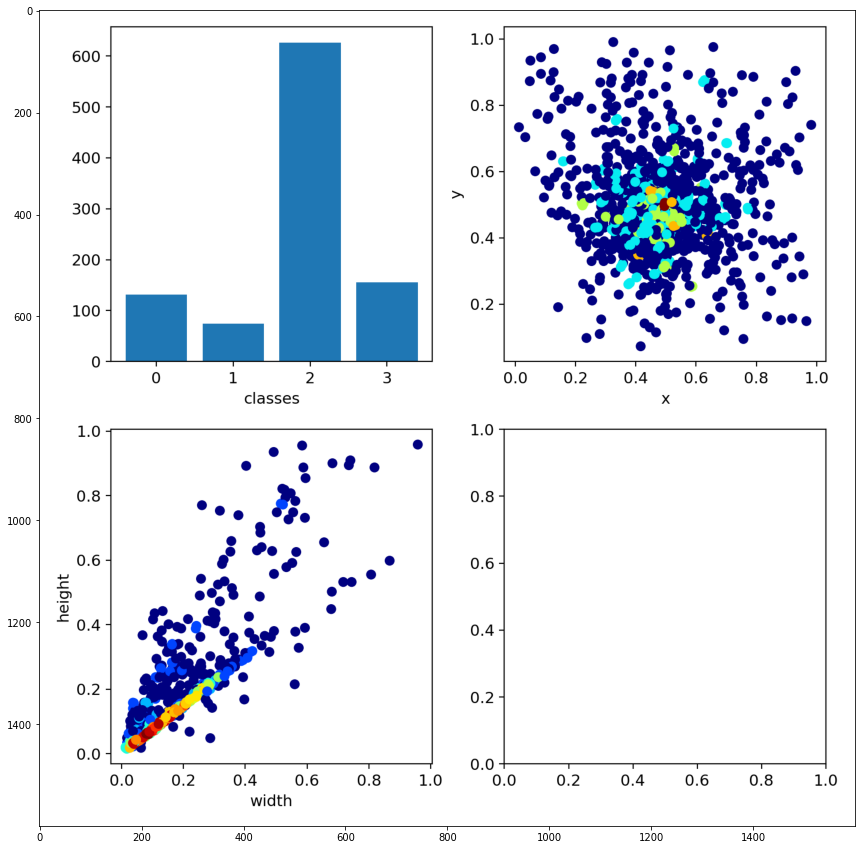

In [ ]:
plt.figure(figsize=(15,15)) 
plt.imshow(np.array(Image.open("/content/yolor/runs/train/yolor_p6/labels.png")))

In [ ]:
import pandas as pd

results = pd.read_csv("/content/yolor/runs/train/yolor_p6/results.txt",delim_whitespace=True)
results


0/49  10.9G  0.02071   0.01688  0.005895  0.04348  33  640       0  \
0    1/49    11G  0.01534  0.010910  0.004301  0.03055  61  640  0.0000   
1    2/49    11G  0.01409  0.008461  0.001948  0.02450  33  640  0.0000   
2    3/49    11G  0.01452  0.007159  0.001056  0.02273  33  640  0.4387   
3    4/49  10.9G  0.01482  0.006718  0.000665  0.02220  21  640  0.4506   
4    5/49  10.9G  0.01550  0.005789  0.000480  0.02176  31  640  0.5134   
5    6/49  10.9G  0.01526  0.005766  0.000455  0.02148  34  640  0.4780   
6    7/49  10.9G  0.01585  0.005362  0.000432  0.02165  23  640  0.6080   
7    8/49  10.9G  0.01725  0.005298  0.000366  0.02291  29  640  0.7261   
8    9/49  10.9G  0.01678  0.005073  0.000317  0.02217  33  640  0.7288   
9   10/49  10.9G  0.01675  0.004973  0.000311  0.02204  42  640  0.7266   
10  11/49  10.9G  0.01875  0.005245  0.000462  0.02445  38  640  0.7290   
11  12/49  10.9G  0.02200  0.005053  0.000347  0.02740  33  640  0.7665   
12  13/49  10.9G  0.02039  0.005048  0.000308  0.02575  41  640  0.7486   
13  14/49  10.9G  0.02129  0.005074  0.000432  0.02680  49  640  0.7776   
14  15/49  10.9G  0.02002  0.005220  0.000465  0.02571  42  640  0.7944   
15  16/49  10.9G  0.02145  0.004842  0.000445  0.02674  41  640  0.7382   
16  17/49  10.9G  0.01981  0.004825  0.000426  0.02506  45  640  0.7296   
17  18/49  10.9G  0.02229  0.005017  0.000417  0.02773  32  640  0.7483   
18  19/49  10.9G  0.02261  0.005406  0.000367  0.02838  45  640  0.7261   
19  20/49  10.9G  0.02355  0.005403  0.000395  0.02935  36  640  0.7597   
20  21/49  10.9G  0.02495  0.005537  0.000496  0.03099  29  640  0.7434   
21  22/49  10.9G  0.02412  0.005333  0.000444  0.02990  25  640  0.8206   
22  23/49  10.9G  0.02343  0.005153  0.000581  0.02917  31  640  0.7635   
23  24/49  10.9G  0.02255  0.005294  0.000484  0.02832  36  640  0.7905   
24  25/49  10.9G  0.02043  0.005058  0.000443  0.02594  37  640  0.7292   
25  26/49  10.9G  0.02174  0.005162  0.000446  0.02735  40  640  0.7097   
26  27/49  10.9G  0.02114  0.005068  0.000428  0.02664  32  640  0.7215   
27  28/49  10.9G  0.01946  0.004897  0.000380  0.02473  41  640  0.7117   
28  29/49  10.9G  0.01858  0.004867  0.000462  0.02391  50  640  0.7308   
29  30/49  10.9G  0.01804  0.004898  0.000403  0.02334  30  640  0.7484   
30  31/49  10.9G  0.01715  0.004686  0.000418  0.02226  46  640  0.7736   
31  32/49  10.9G  0.01658  0.004565  0.000334  0.02148  39  640  0.7625   
32  33/49  10.9G  0.01561  0.004513  0.000290  0.02042  37  640  0.7665   
33  34/49  10.9G  0.01469  0.004224  0.000278  0.01920  43  640  0.7444   
34  35/49  10.9G  0.01412  0.004230  0.000267  0.01862  27  640  0.7651   
35  36/49  10.9G  0.01411  0.004037  0.000271  0.01842  22  640  0.8169   
36  37/49  10.9G  0.01447  0.004195  0.000297  0.01897  27  640  0.7916   
37  38/49  10.9G  0.01355  0.004125  0.000277  0.01795  33  640  0.7951   
38  39/49  10.9G  0.01288  0.004281  0.000247  0.01741  34  640  0.7603   
39  40/49  10.9G  0.01247  0.004030  0.000251  0.01675  37  640  0.6830   
40  41/49  10.9G  0.01284  0.004212  0.000257  0.01731  44  640  0.6792   
41  42/49  10.9G  0.01209  0.004173  0.000267  0.01653  33  640  0.7378   
42  43/49  10.9G  0.01176  0.004169  0.000216  0.01615  25  640  0.7272   
43  44/49  10.9G  0.01116  0.004046  0.000220  0.01543  40  640  0.7425   
44  45/49  10.9G  0.01079  0.003997  0.000195  0.01498  27  640  0.7400   
45  46/49  10.9G  0.01084  0.004066  0.000197  0.01510  43  640  0.7403   
46  47/49  10.9G  0.01077  0.003943  0.000197  0.01492  41  640  0.7107   
47  48/49  10.9G  0.01148  0.003919  0.000195  0.01560  24  640  0.7230   
48  49/49  10.9G  0.01113  0.003741  0.000176  0.01505  44  640  0.7993   

       0.1     0.2     0.3      0.4       0.5       0.6  
0   0.0000  0.0000  0.0000  0.00000  0.000000  0.000000  
1   0.0000  0.0000  0.0000  0.00000  0.000000  0.000000  
2   0.7956  0.7599  0.6272  0.01313  0.005479  0.000556  
3   0.8464  0.8239  0.

<a name='te'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Test du modele
        </h1>
    </div>
</div>

In [ ]:
!python detect.py --device 0 --conf 0.50  --names '/content/yolor/data/road_sign_data.names' --source /content/Road_Sign_Dataset/images/test/ --weights runs/train/yolor_p6/weights/best.pt  

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolor_p6.cfg', classes=None, conf_thres=0.5, device='0', img_size=1280, iou_thres=0.5, names='/content/yolor/data/road_sign_data.names', output='inference/output', save_txt=False, source='/content/Road_Sign_Dataset/images/test/', update=False, view_img=False, weights=['runs/train/yolor_p6/weights/best.pt'])
image 1/88 /content/Road_Sign_Dataset/images/test/road100.png: 1280x1280 Done. (0.059s)
image 2/88 /content/Road_Sign_Dataset/images/test/road113.png: 896x1280 1 speedlimits, Done. (0.042s)
image 3/88 /content/Road_Sign_Dataset/images/test/road129.png: 896x1280 1 crosswalks, Done. (0.042s)
image 4/88 /content/Road_Sign_Dataset/images/test/road140.png: 896x1280 1 crosswalks, Done. (0.042s)
image 5/88 /content/Road_Sign_Dataset/images/test/road142.png: 1280x896 1 crosswalks, Done. (0.042s)
image 6/88 /content/Road_Sign_Dataset/images/test/road143.png: 1280x896 1 crosswalks, Done. (0.042s)
image 7/88 /content/Road_Sign_Dataset/image

In [ ]:
# !rm -rf /content/yolov5/runs/train/yolo_road_det

In [ ]:
# !rm -rf /content/yolov5/runs/detect/road_sign

In [ ]:
def show_images_from_directory(path, num_sample):
    fig = plt.figure(figsize=(30,50))
    fig.patch.set_facecolor('#377AB7')
    images = os.listdir(path + "/" )[:num_sample]
    for i in range(num_sample):
        img = imgmp.imread(path+"/"+images[i])
        plt.subplot(num_sample/num_sample+1, num_sample, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show() 

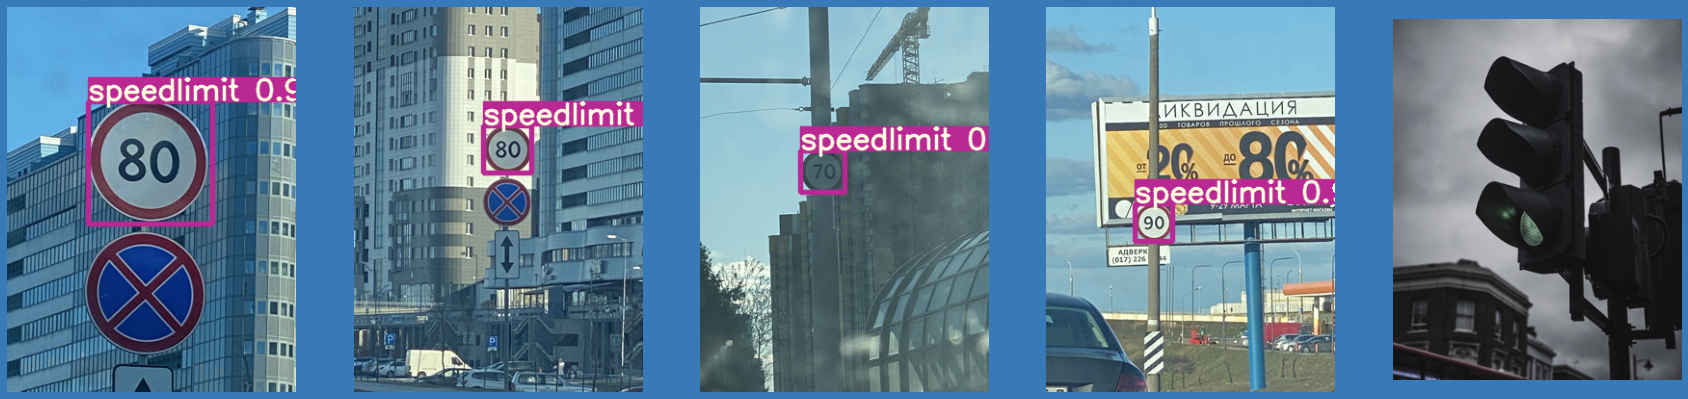

In [ ]:
import matplotlib.image as imgmp
sign_list =["trafficlight","stop", "speedlimit","crosswalk"]
show_images_from_directory("/content/yolor/inference/output", 5)

In [ ]:
import os
from PIL import Image, ImageDraw
import random
import numpy as np
import matplotlib.pyplot as plt
detections_dir = "/content/yolor/inference/output"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]


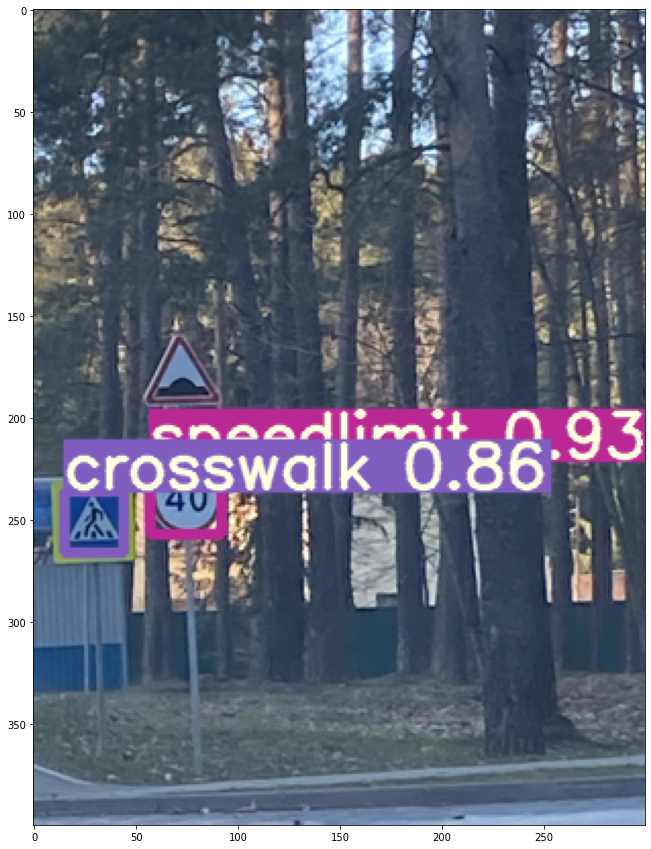

In [ ]:
plt.figure(figsize=(15,15))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

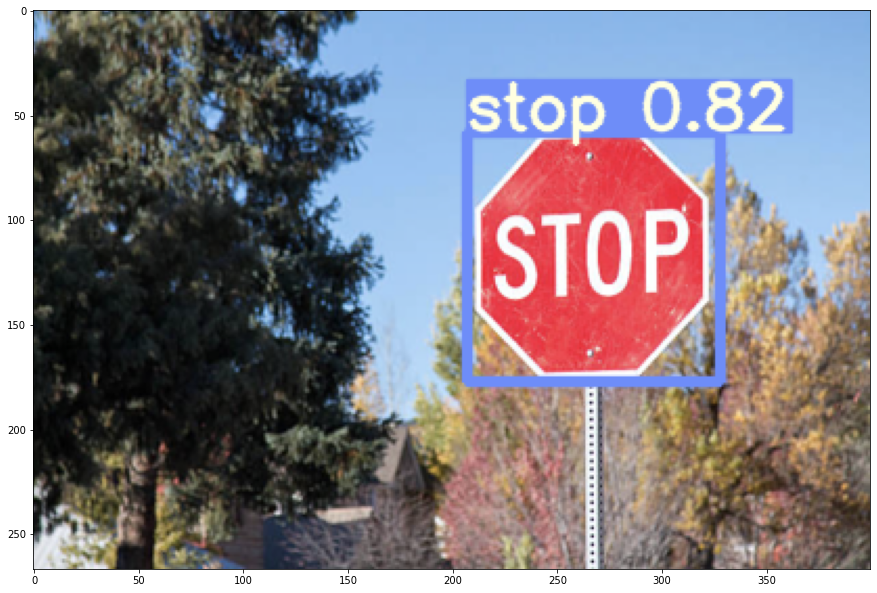

In [ ]:
random.seed(15)
plt.figure(figsize=(15,15))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

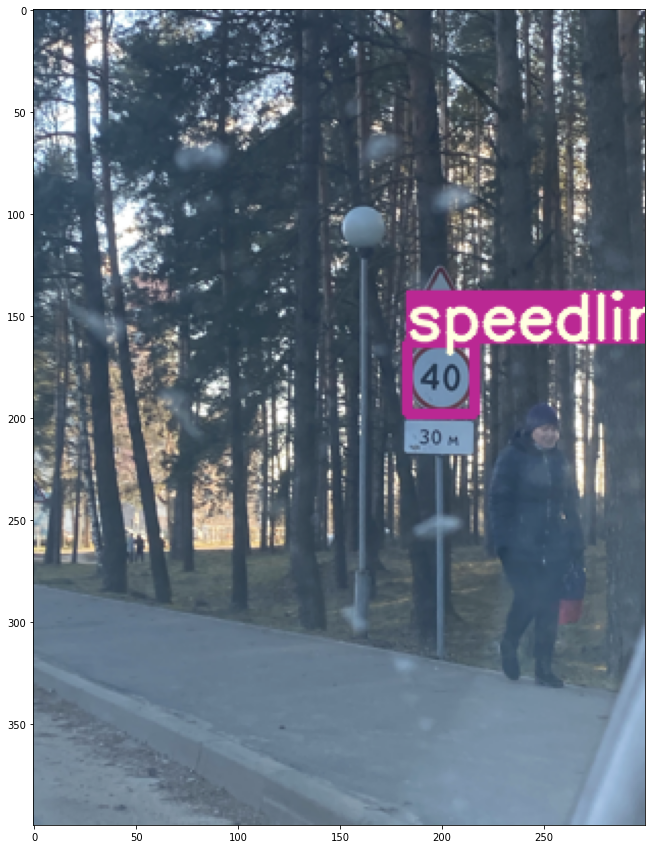

In [ ]:
random.seed(155)
plt.figure(figsize=(15,15))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

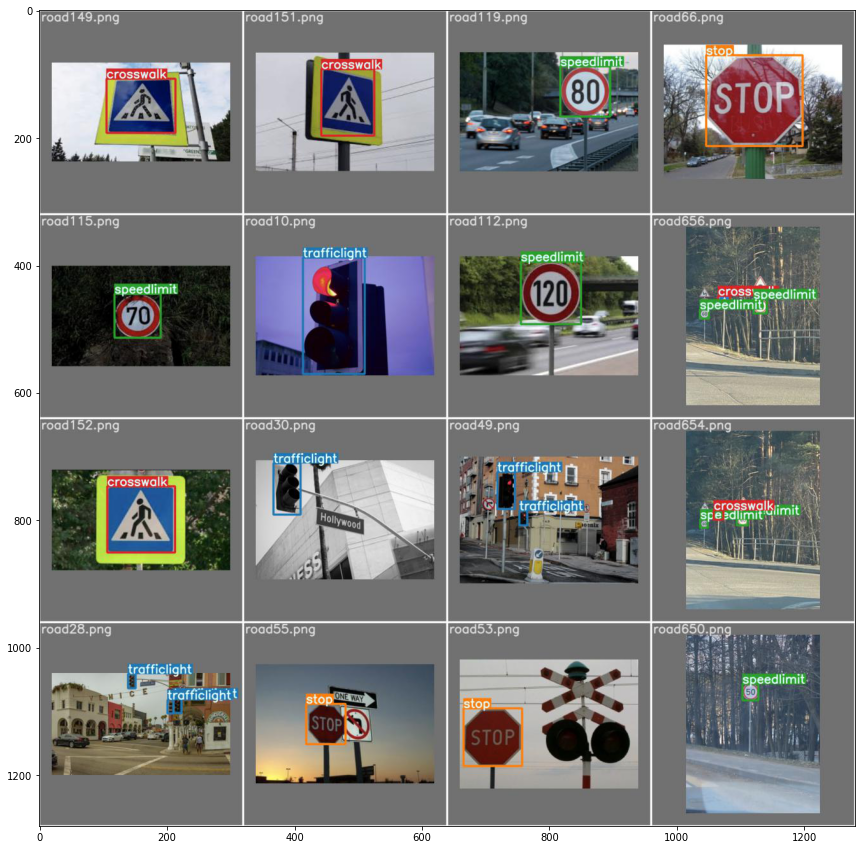

In [ ]:
plt.figure(figsize=(15,15)) 
plt.imshow(np.array(Image.open("/content/yolor/runs/test/test6/test_batch0_labels.jpg")))

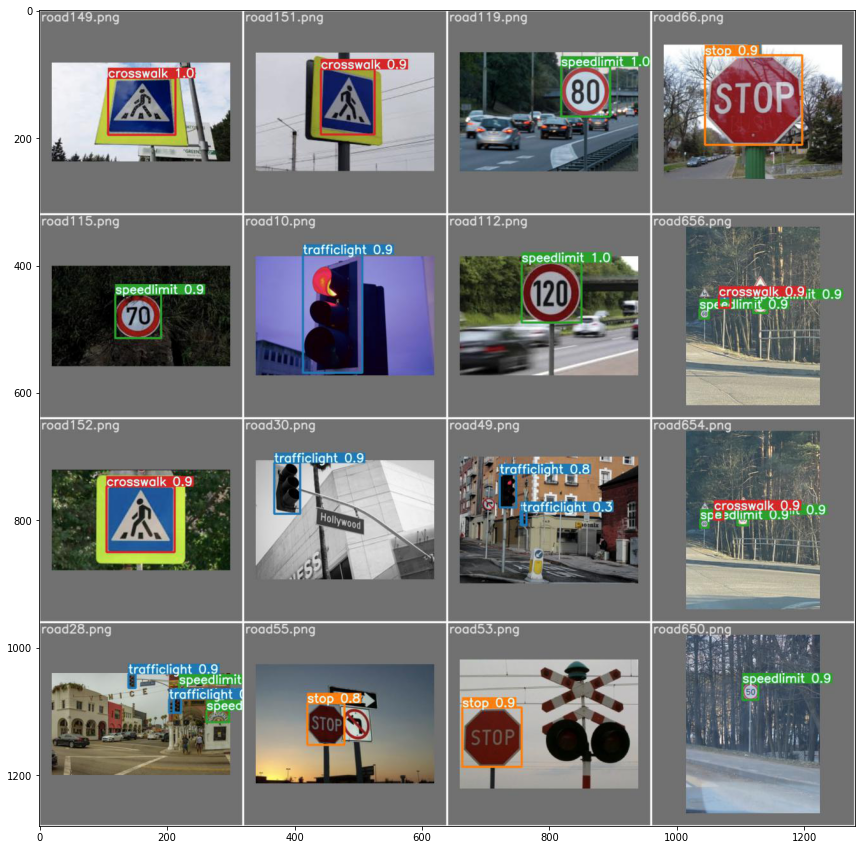

In [ ]:
plt.figure(figsize=(15,15)) 
plt.imshow(np.array(Image.open("/content/yolor/runs/test/test6/test_batch0_pred.jpg")))

In [ ]:
!cp -avr /content/yolor/runs/train/yolor_p6/ /content/ShardDrives/MyDrive/roadsign/results_yolor_p6

'/content/yolor/runs/train/yolor_p6/' -> '/content/ShardDrives/MyDrive/roadsign/results_yolor_p6'
'/content/yolor/runs/train/yolor_p6/events.out.tfevents.1651748820.1964559b3942.2534.0' -> '/content/ShardDrives/MyDrive/roadsign/results_yolor_p6/events.out.tfevents.1651748820.1964559b3942.2534.0'
'/content/yolor/runs/train/yolor_p6/weights' -> '/content/ShardDrives/MyDrive/roadsign/results_yolor_p6/weights'
'/content/yolor/runs/train/yolor_p6/weights/init.pt' -> '/content/ShardDrives/MyDrive/roadsign/results_yolor_p6/weights/init.pt'
'/content/yolor/runs/train/yolor_p6/weights/last.pt' -> '/content/ShardDrives/MyDrive/roadsign/results_yolor_p6/weights/last.pt'
'/content/yolor/runs/train/yolor_p6/weights/best.pt' -> '/content/ShardDrives/MyDrive/roadsign/results_yolor_p6/weights/best.pt'
'/content/yolor/runs/train/yolor_p6/weights/best_overall.pt' -> '/content/ShardDrives/MyDrive/roadsign/results_yolor_p6/weights/best_overall.pt'
'/content/yolor/runs/train/yolor_p6/weights/best_p.pt' -> 